In [286]:
import pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

pip install pydotplus

In [287]:
data = pandas.read_csv("titanic.csv")
data.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [288]:
feature_cols = ["sex"]

X = data[feature_cols]
y = data["survived"]

In [289]:
encoder = OneHotEncoder()
X = encoder.fit_transform(X)

In [290]:
X

<891x2 sparse matrix of type '<class 'numpy.float64'>'
	with 891 stored elements in Compressed Sparse Row format>

In [291]:
print(X)

  (0, 1)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 1)	1.0
  (7, 1)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 0)	1.0
  (15, 0)	1.0
  (16, 1)	1.0
  (17, 1)	1.0
  (18, 0)	1.0
  (19, 0)	1.0
  (20, 1)	1.0
  (21, 1)	1.0
  (22, 0)	1.0
  (23, 1)	1.0
  (24, 0)	1.0
  :	:
  (866, 0)	1.0
  (867, 1)	1.0
  (868, 1)	1.0
  (869, 1)	1.0
  (870, 1)	1.0
  (871, 0)	1.0
  (872, 1)	1.0
  (873, 1)	1.0
  (874, 0)	1.0
  (875, 0)	1.0
  (876, 1)	1.0
  (877, 1)	1.0
  (878, 1)	1.0
  (879, 0)	1.0
  (880, 0)	1.0
  (881, 1)	1.0
  (882, 0)	1.0
  (883, 1)	1.0
  (884, 1)	1.0
  (885, 0)	1.0
  (886, 1)	1.0
  (887, 0)	1.0
  (888, 0)	1.0
  (889, 1)	1.0
  (890, 1)	1.0


In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [293]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

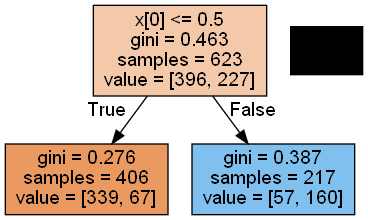

In [294]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [295]:
encoder.get_feature_names_out()

array(['sex_female', 'sex_male'], dtype=object)

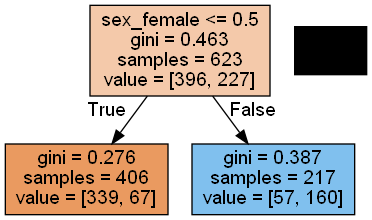

In [296]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, feature_names=encoder.get_feature_names_out())
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

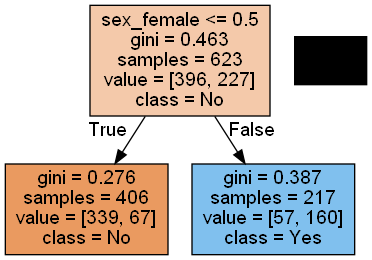

In [297]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, feature_names=encoder.get_feature_names_out(), class_names=["No", "Yes"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

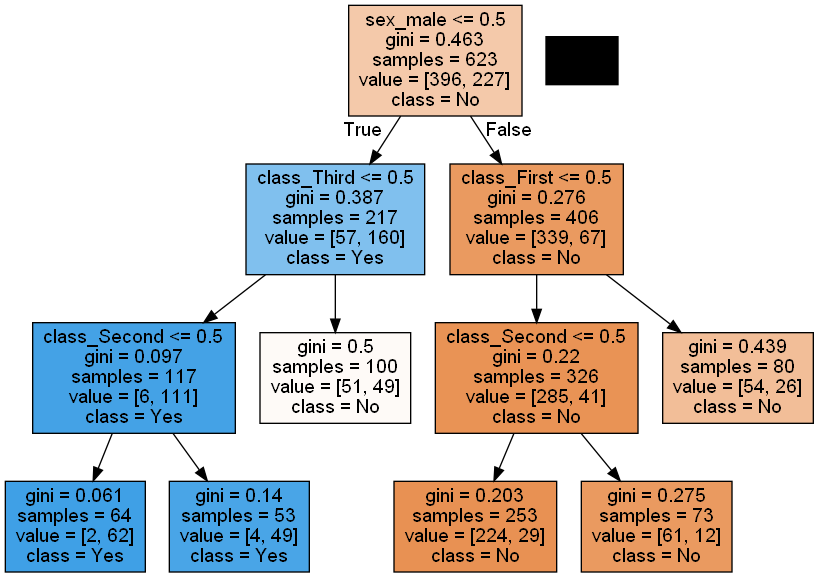

In [298]:
feature_cols = ["sex", "class"]

X = data[feature_cols]
y = data["survived"]

encoder = OneHotEncoder()
X = encoder.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, feature_names=encoder.get_feature_names_out(), class_names=["No", "Yes"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

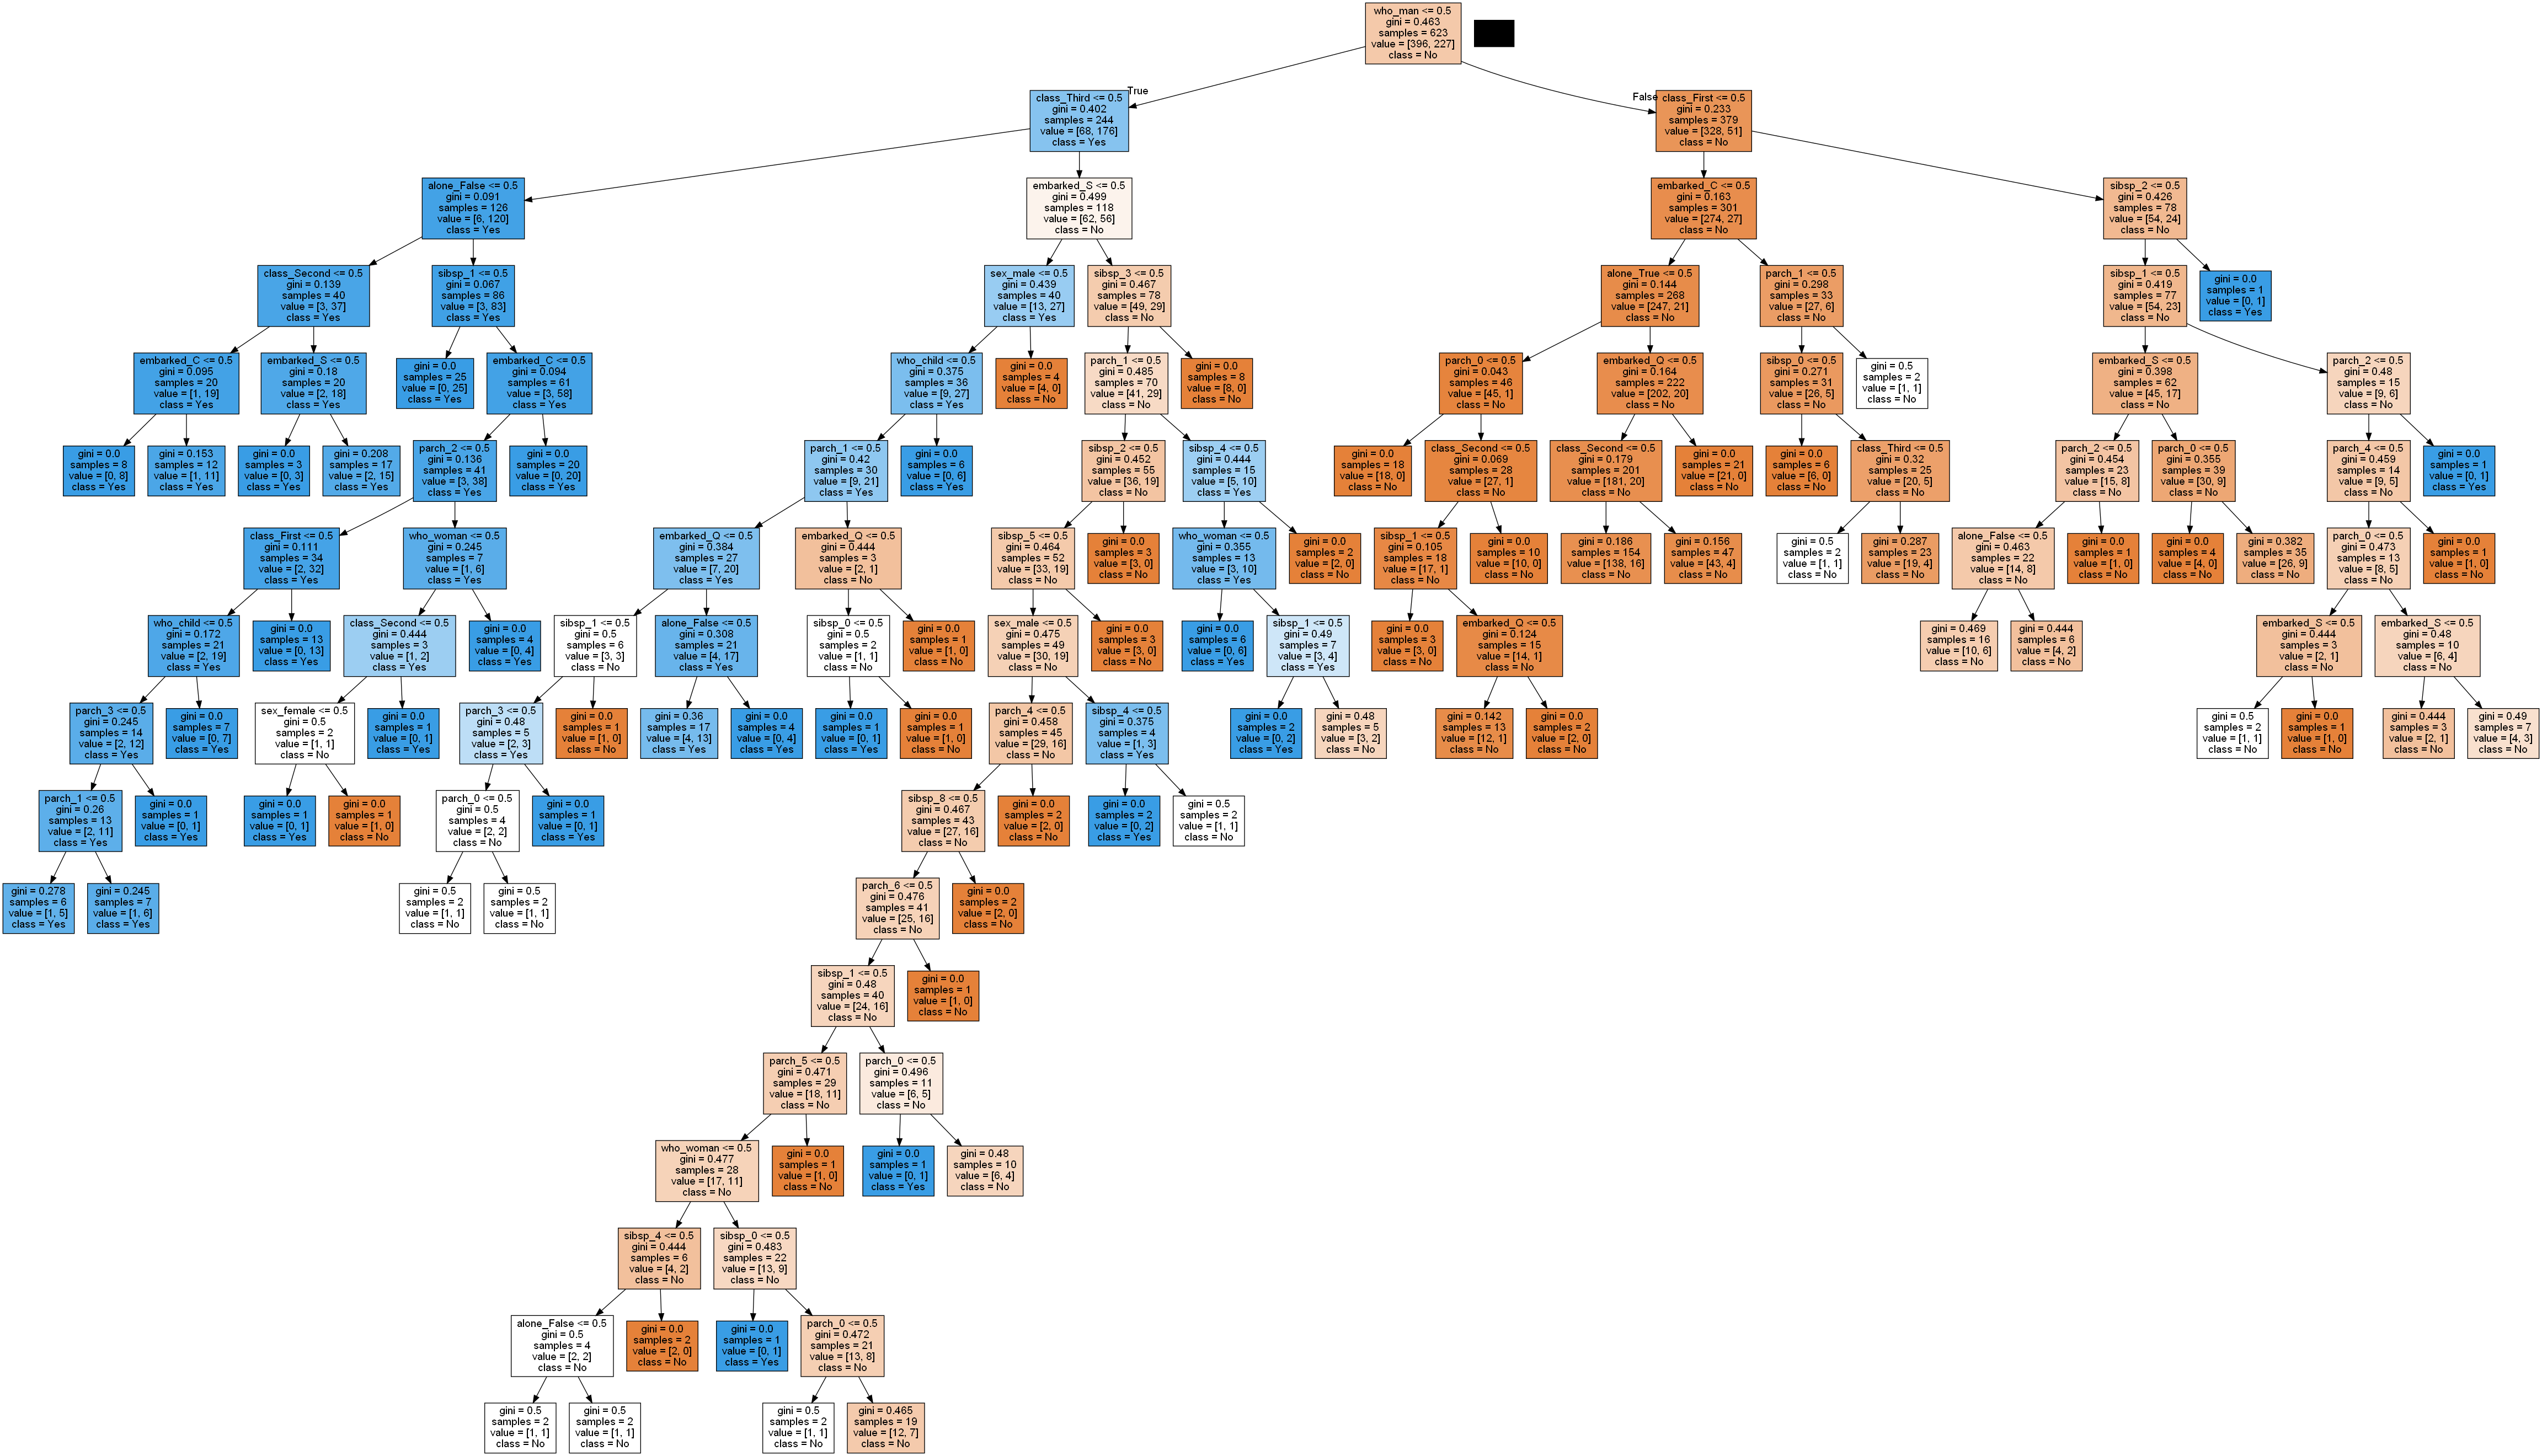

In [299]:
feature_cols = ["sex", "sibsp", "parch", "embarked", "class", "who", "alone"]

X = data[feature_cols]
y = data["survived"]

encoder = OneHotEncoder()
X = encoder.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, feature_names=encoder.get_feature_names_out(), class_names=["No", "Yes"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

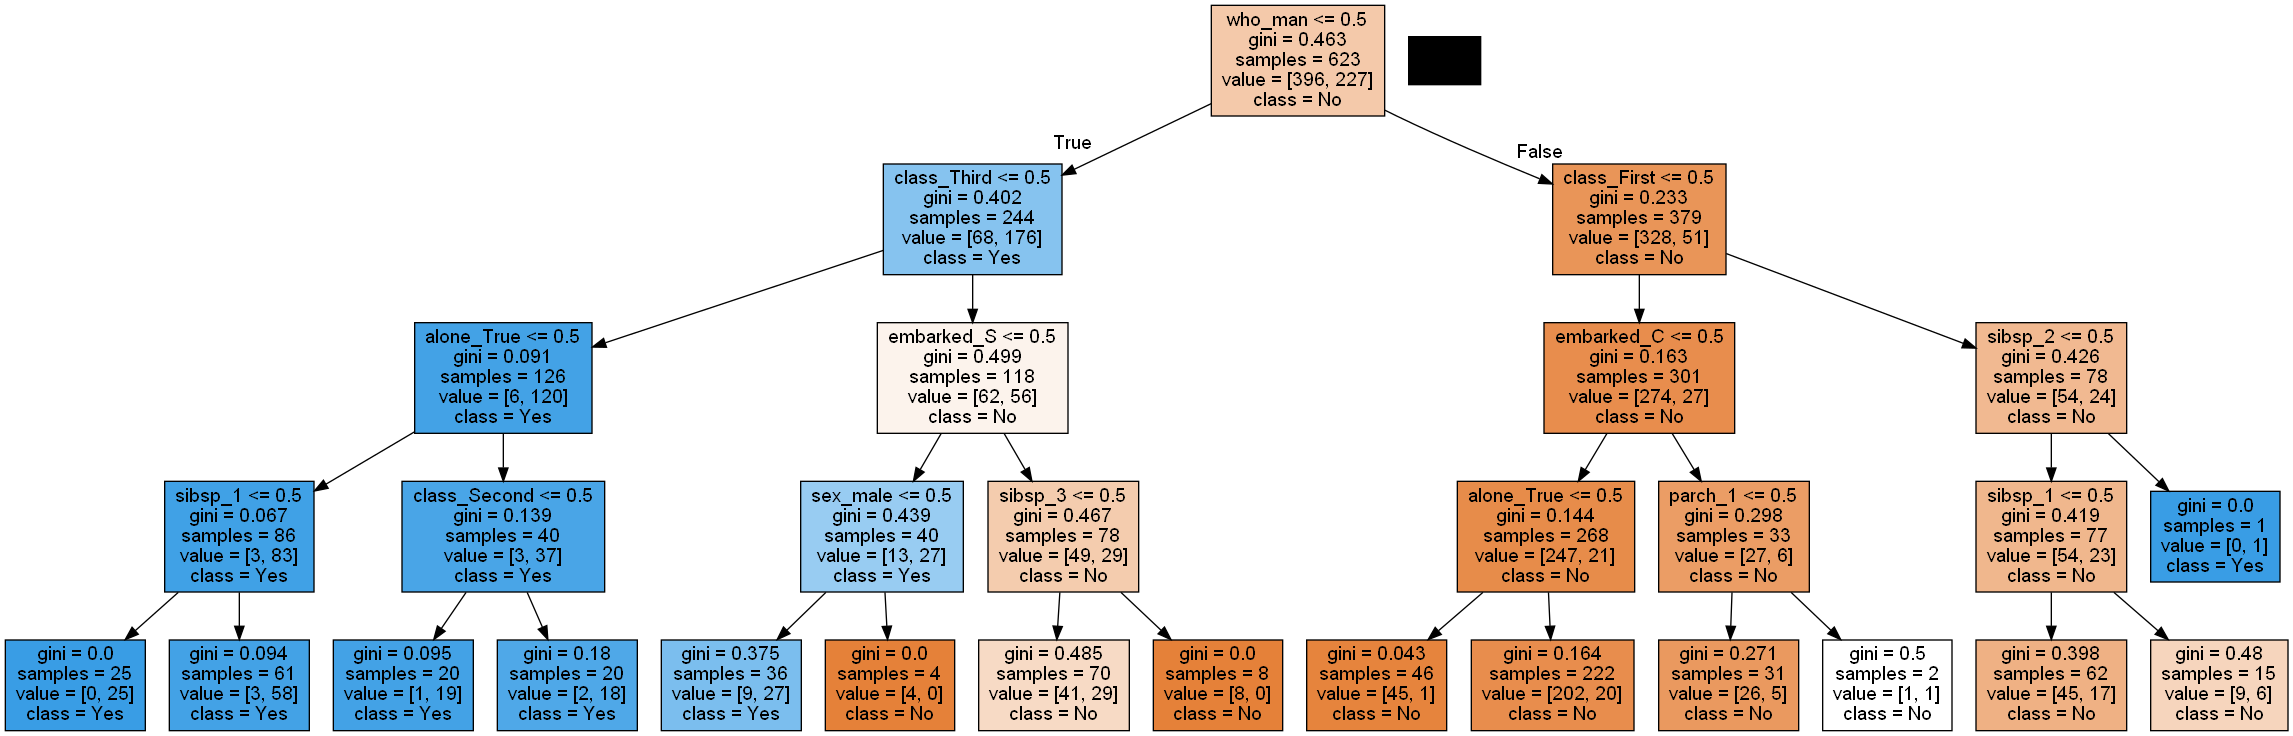

In [300]:
clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, feature_names=encoder.get_feature_names_out(), class_names=["No", "Yes"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [308]:
import numpy

y = data["survived"]

categorical_columns = ["sex", "sibsp", "parch", "embarked", "class", "who", "alone"]
numeric_columns = ["fare"]

ohe = OneHotEncoder(sparse_output=False)
others = data[numeric_columns].to_numpy()
encoded_columns = ohe.fit_transform(data[categorical_columns])

X = numpy.concatenate([encoded_columns, others], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

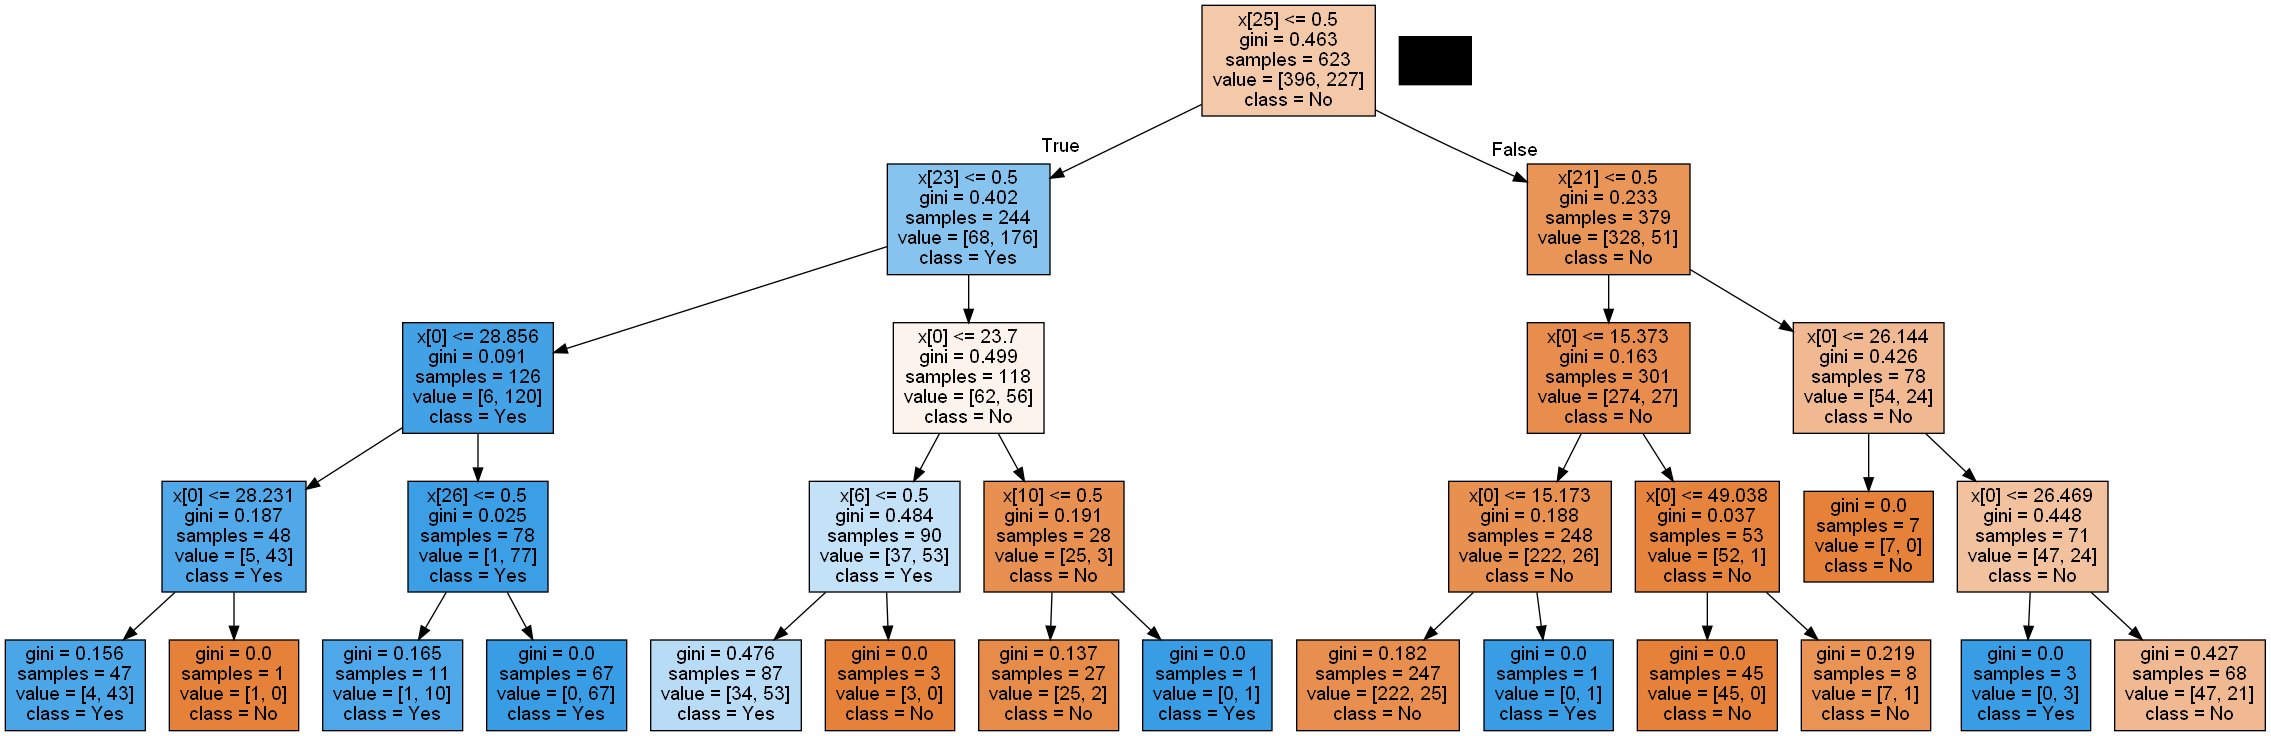

In [302]:
clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, class_names=["No", "Yes"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

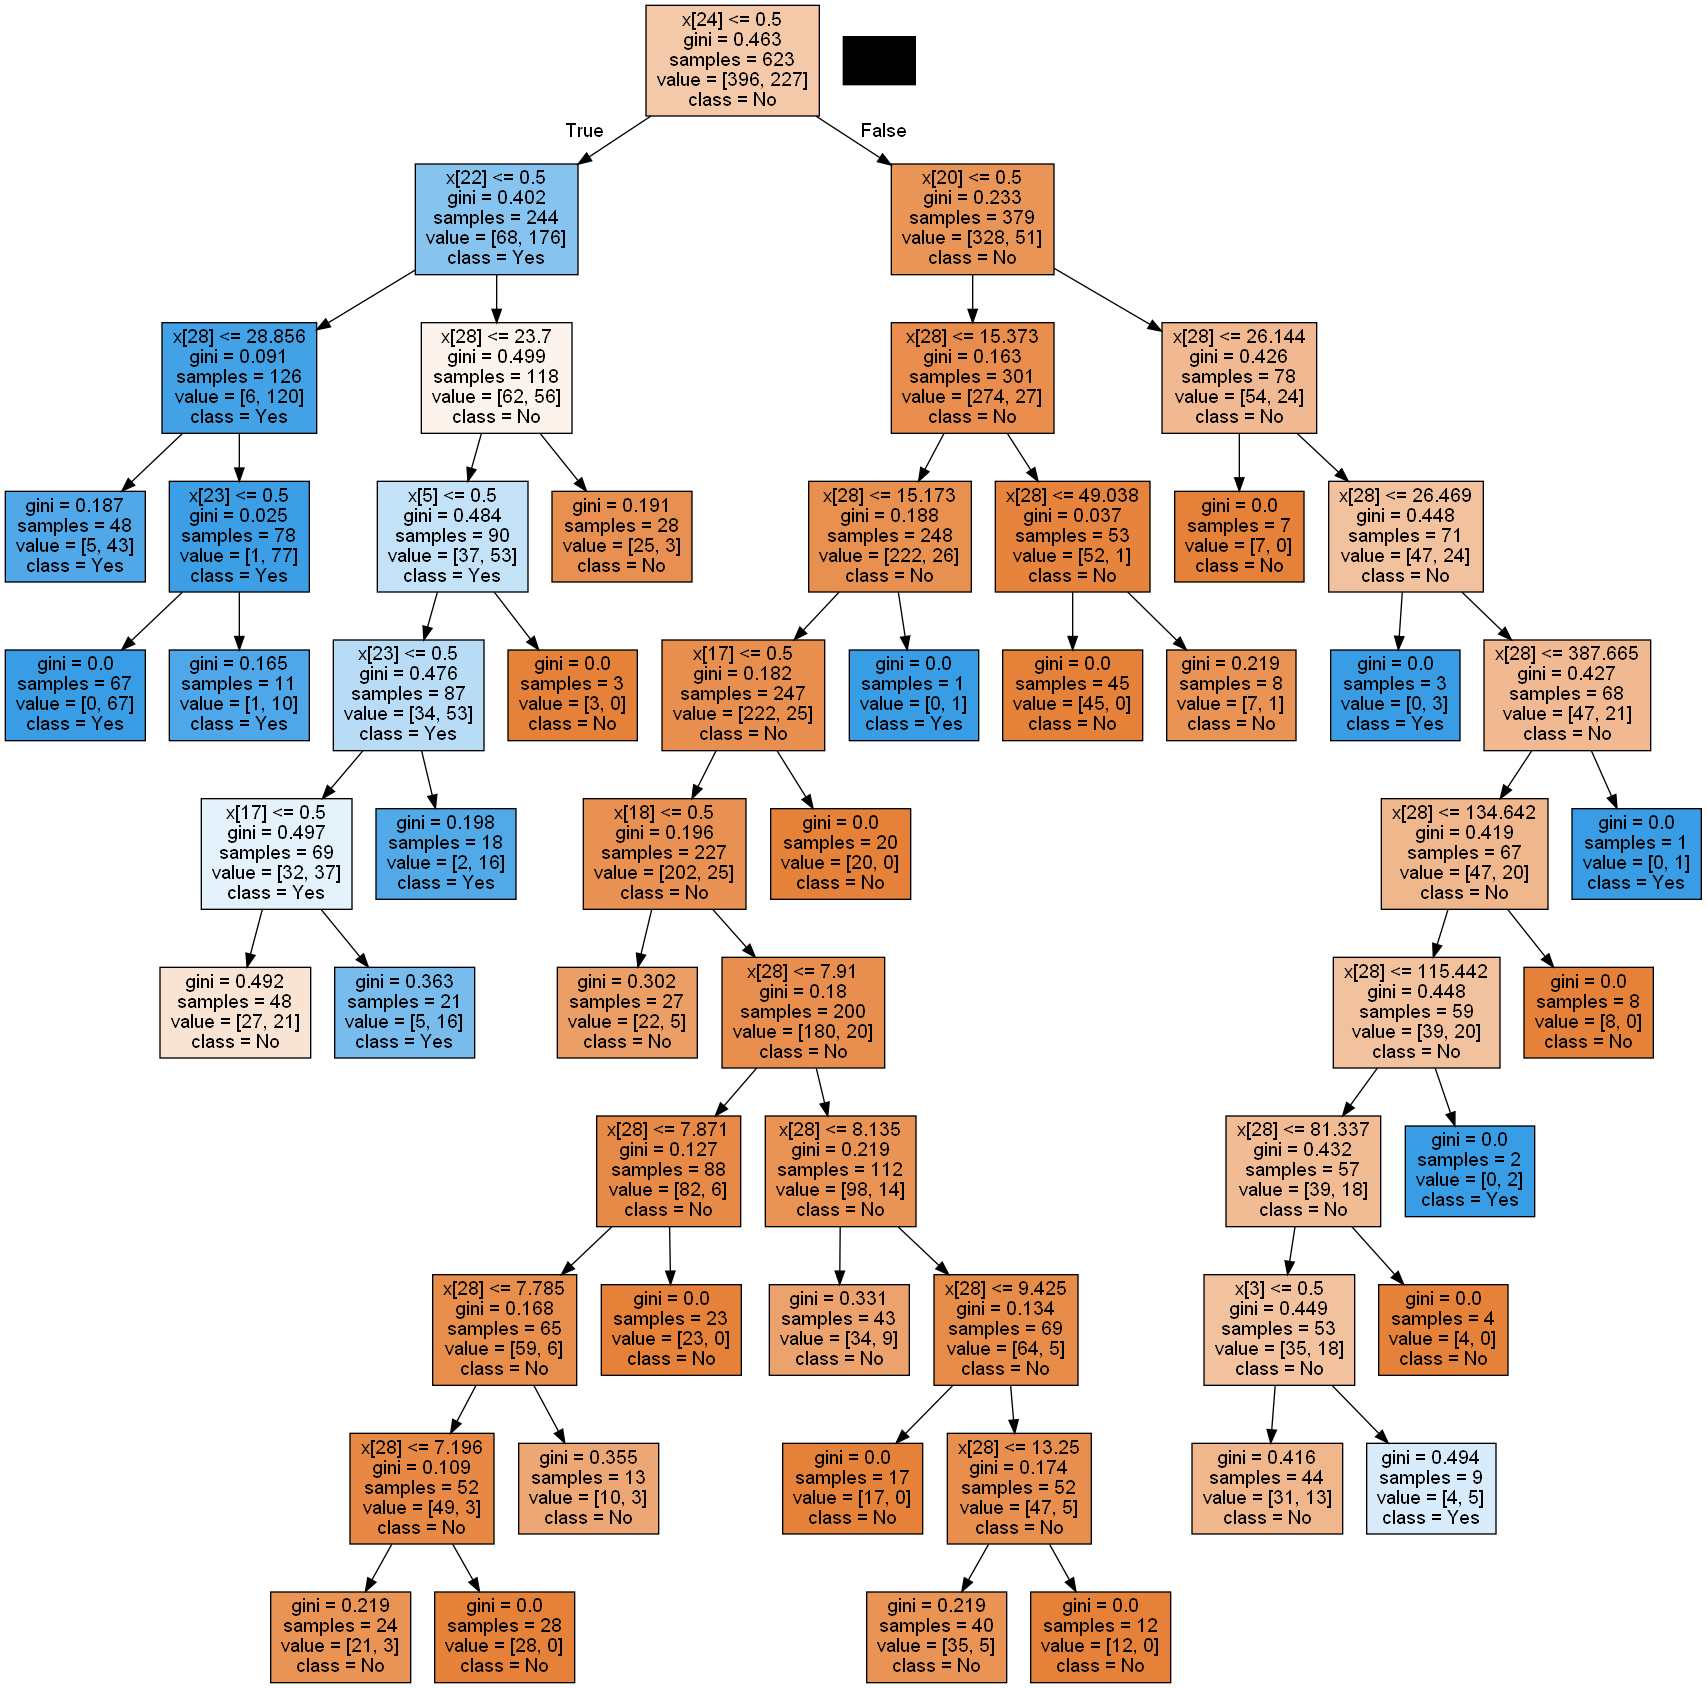

In [315]:
clf = DecisionTreeClassifier(min_samples_split=50)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, class_names=["No", "Yes"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())